## データ準備とNaNレコードの削除

In [1]:
import pandas as pd
import numpy as np

df_dir = 'input_df'

split_list = [0, 1000, 2000, 3000, 4000, 5663]

df = pd.DataFrame({'id': [0]})
for idx, sl in enumerate(split_list):
  if idx == 0:
    continue
  
  tmp_df = pd.read_csv(f'{df_dir}/movies_{split_list[idx-1]}_{sl}.csv')
  if idx == 1:
    df = tmp_df
  else:
    df = pd.concat([df, tmp_df]).reset_index(drop=True)

df

,tmdb_id,filmarks_id,title,tmdb_overview,filmarks_overview,genre_name1,genre_id1,genre_name2,genre_id2,genre_name3,genre_id3
0,278,19119,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,"""スティーヴン・キングの中編小説「刑務所のリタ・ヘイワース」をフランク・ダラボン監督が映画化...",ドラマ,8,NaN,0,NaN,0
1,238,12825,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,"""アメリカで絶大な権力を握るコルレオーネ・ファミリーが崩壊の危機に立たされる様を描いた作品。...",アクション,5,クライム,896,ギャング・マフィア,902
2,424,14275,シンドラーのリスト,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,"""ナチスによるユダヤ人大虐殺のさなか、1,100人以上のユダヤ人の命を救った、謎めいた男オス...",ドラマ,8,歴史,893,伝記,899
3,372058,65931,君の名は。,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...","""千年ぶりとなる彗星の来訪を一か月後に控えた日本。山深い田舎町に暮らす女子高校生・三葉は憂鬱...",恋愛,25,アニメ,61,NaN,0
4,240,38145,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,"""コルレオーネ・ファミリーは本拠地をニューヨークからラスベガスに近いタホー湖畔へ移っていた。...",アクション,5,ドラマ,8,ギャング・マフィア,902
...,...,...,...,...,...,...,...,...,...,...,...
2807,9708,31250,ウィッカーマン,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...,NaN,サスペンス,2,NaN,0,NaN,0
2808,218043,59404,レフト・ビハインド,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...,"""何の前触れもなく、世界各国で数百万もの人間が消失するという異常な事態が発生。各種通信網やエ...",サスペンス,2,パニック,891,NaN,0
2809,10214,17888,マスク2,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...,"""アニメ会社に勤めるティムは、妻のトーニャと平穏に暮らしていた。 そんなある日、愛犬オーティ...",コメディ,20,NaN,0,NaN,0
2810,7278,15443,ほぼ300＜スリーハンドレッド＞,NaN,NaN,コメディ,20,NaN,0,NaN,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tmdb_id            2812 non-null   int64 
 1   filmarks_id        2812 non-null   int64 
 2   title              2812 non-null   object
 3   tmdb_overview      2225 non-null   object
 4   filmarks_overview  1193 non-null   object
 5   genre_name1        2812 non-null   object
 6   genre_id1          2812 non-null   int64 
 7   genre_name2        1213 non-null   object
 8   genre_id2          2812 non-null   int64 
 9   genre_name3        349 non-null    object
 10  genre_id3          2812 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 241.8+ KB


In [3]:
df.query(' tmdb_overview.isna() and filmarks_overview.isna() ', engine='python')

,tmdb_id,filmarks_id,title,tmdb_overview,filmarks_overview,genre_name1,genre_id1,genre_name2,genre_id2,genre_name3,genre_id3
19,522924,81734,エンツォ レーサーになりたかった犬とある家族の物語,NaN,NaN,ドラマ,8,NaN,0,NaN,0
25,537061,89827,Steven Universe: The Movie,NaN,NaN,アニメ,61,NaN,0,NaN,0
31,599,11983,サンセット大通り,NaN,NaN,ドラマ,8,NaN,0,NaN,0
40,527641,81870,Five Feet Apart,NaN,NaN,恋愛,25,NaN,0,NaN,0
44,452522,12751,ツイン・ピークス,NaN,NaN,サスペンス,2,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2795,10283,21100,13日の金曜日 PART8／ジェイソンN.Y.へ,NaN,NaN,ホラー,17,NaN,0,NaN,0
2800,10285,30955,13日の金曜日／ジェイソンの命日,NaN,NaN,ホラー,17,NaN,0,NaN,0
2805,11531,3597,ブレアウィッチ2,NaN,NaN,ホラー,17,NaN,0,NaN,0
2806,71880,5390,ジャックとジル,NaN,NaN,ドラマ,8,NaN,0,NaN,0


In [4]:
# TMDbとFilmarksのOverviewが共にNaNのレコード削除
df = df.dropna(subset=['tmdb_overview', 'filmarks_overview'], how='all').reset_index(drop=True)
df

,tmdb_id,filmarks_id,title,tmdb_overview,filmarks_overview,genre_name1,genre_id1,genre_name2,genre_id2,genre_name3,genre_id3
0,278,19119,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,"""スティーヴン・キングの中編小説「刑務所のリタ・ヘイワース」をフランク・ダラボン監督が映画化...",ドラマ,8,NaN,0,NaN,0
1,238,12825,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,"""アメリカで絶大な権力を握るコルレオーネ・ファミリーが崩壊の危機に立たされる様を描いた作品。...",アクション,5,クライム,896,ギャング・マフィア,902
2,424,14275,シンドラーのリスト,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,"""ナチスによるユダヤ人大虐殺のさなか、1,100人以上のユダヤ人の命を救った、謎めいた男オス...",ドラマ,8,歴史,893,伝記,899
3,372058,65931,君の名は。,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...","""千年ぶりとなる彗星の来訪を一か月後に控えた日本。山深い田舎町に暮らす女子高校生・三葉は憂鬱...",恋愛,25,アニメ,61,NaN,0
4,240,38145,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,"""コルレオーネ・ファミリーは本拠地をニューヨークからラスベガスに近いタホー湖畔へ移っていた。...",アクション,5,ドラマ,8,ギャング・マフィア,902
...,...,...,...,...,...,...,...,...,...,...,...
2385,307663,61787,デッド・シティ2055,近未来。巨大企業を率いるジュリアンは、ヴァイスという富裕層に向けたリゾート施設を建造する。そ...,NaN,アクション,5,SF,42,NaN,0
2386,9708,31250,ウィッカーマン,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...,NaN,サスペンス,2,NaN,0,NaN,0
2387,218043,59404,レフト・ビハインド,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...,"""何の前触れもなく、世界各国で数百万もの人間が消失するという異常な事態が発生。各種通信網やエ...",サスペンス,2,パニック,891,NaN,0
2388,10214,17888,マスク2,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...,"""アニメ会社に勤めるティムは、妻のトーニャと平穏に暮らしていた。 そんなある日、愛犬オーティ...",コメディ,20,NaN,0,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tmdb_id            2390 non-null   int64 
 1   filmarks_id        2390 non-null   int64 
 2   title              2390 non-null   object
 3   tmdb_overview      2225 non-null   object
 4   filmarks_overview  1193 non-null   object
 5   genre_name1        2390 non-null   object
 6   genre_id1          2390 non-null   int64 
 7   genre_name2        1118 non-null   object
 8   genre_id2          2390 non-null   int64 
 9   genre_name3        332 non-null    object
 10  genre_id3          2390 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 205.5+ KB


## データを眺める

In [6]:
### ジャンルの名前が NaN の数と割合
print(f'genre_name2==NaN: {len(df.query(" genre_name2.isna() ", engine="python"))}, ({(len(df.query(" genre_name2.isna() ", engine="python")) / len(df)):.3f})')
print(f'genre_name3==NaN: {len(df.query(" genre_name3.isna() ", engine="python"))}, ({(len(df.query(" genre_name3.isna() ", engine="python")) / len(df)):.3f})')

genre_name2==NaN: 1272, (0.532)
genre_name3==NaN: 2058, (0.861)


In [7]:
### ラベル1の分布
df['genre_name1'].value_counts()

ドラマ            746
アクション          589
サスペンス          217
コメディ           200
ホラー            118
ファミリー          115
アドベンチャー・冒険     107
アニメ             91
恋愛              55
SF              30
ミステリー           25
クライム            17
ファンタジー          12
音楽              10
ドキュメンタリー        10
スリラー             9
パニック             8
戦争               6
時代劇              5
青春               5
ミュージカル           4
歴史               4
ショートフィルム・短編      3
スポーツ             2
西部劇              1
伝記               1
Name: genre_name1, dtype: int64

In [ ]:
### グラフの日本語化
!pip install japanize-matplotlib

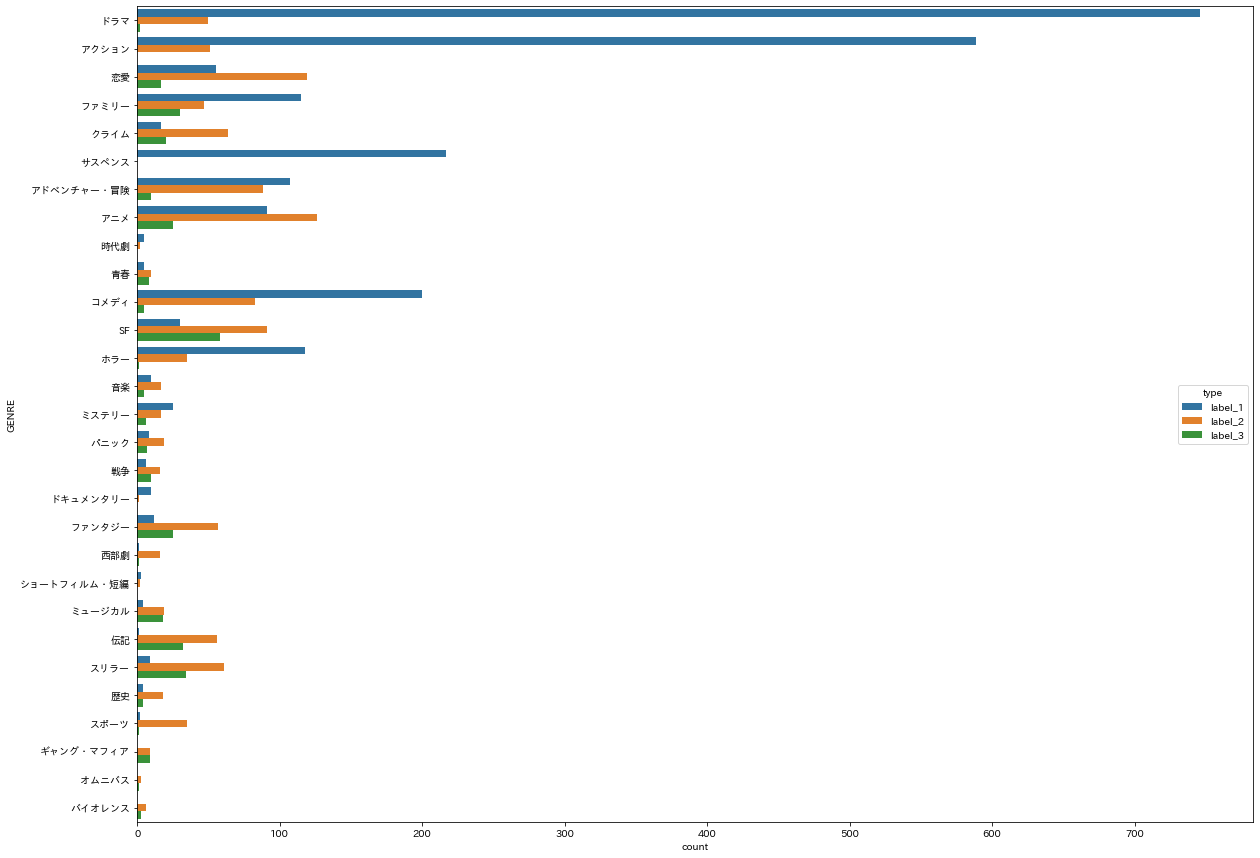

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
import seaborn as sns

### プロット用にDF作成
plot_df1 = df[['genre_name1']].rename(columns={'genre_name1': 'GENRE'})
plot_df1['type'] = 'label_1'
plot_df2 = df[['genre_name2']].rename(columns={'genre_name2': 'GENRE'})
plot_df2['type'] = 'label_2'
plot_df3 = df[['genre_name3']].rename(columns={'genre_name3': 'GENRE'})
plot_df3['type'] = 'label_3'
plot_df = pd.concat([plot_df1, plot_df2, plot_df3])

### 予測データのヒストグラム
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=plot_df, y='GENRE', hue='type', ax=ax)

In [10]:
df.at[0, 'tmdb_overview']

'妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑っていたが、やがて彼は自ら持つ不思議な魅力ですさんだ受刑者達の心を掴んでゆく。そして20年の歳月が流れた時、彼は冤罪を晴らす重要な証拠をつかむ。'

In [11]:
df.at[0, 'filmarks_overview']

'"スティーヴン・キングの中編小説「刑務所のリタ・ヘイワース」をフランク・ダラボン監督が映画化。無実の罪で刑務所に収監されたアンディは、30年にも及ぶ刑務所生活にもめげず、強い意志で奇跡を起こす。"'

## 前処理

In [12]:
df['OVERVIEW'] = df['tmdb_overview'].fillna('') + df['filmarks_overview'].fillna('')
df

,tmdb_id,filmarks_id,title,tmdb_overview,filmarks_overview,genre_name1,genre_id1,genre_name2,genre_id2,genre_name3,genre_id3,OVERVIEW
0,278,19119,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,"""スティーヴン・キングの中編小説「刑務所のリタ・ヘイワース」をフランク・ダラボン監督が映画化...",ドラマ,8,NaN,0,NaN,0,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...
1,238,12825,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,"""アメリカで絶大な権力を握るコルレオーネ・ファミリーが崩壊の危機に立たされる様を描いた作品。...",アクション,5,クライム,896,ギャング・マフィア,902,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...
2,424,14275,シンドラーのリスト,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,"""ナチスによるユダヤ人大虐殺のさなか、1,100人以上のユダヤ人の命を救った、謎めいた男オス...",ドラマ,8,歴史,893,伝記,899,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...
3,372058,65931,君の名は。,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...","""千年ぶりとなる彗星の来訪を一か月後に控えた日本。山深い田舎町に暮らす女子高校生・三葉は憂鬱...",恋愛,25,アニメ,61,NaN,0,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三..."
4,240,38145,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,"""コルレオーネ・ファミリーは本拠地をニューヨークからラスベガスに近いタホー湖畔へ移っていた。...",アクション,5,ドラマ,8,ギャング・マフィア,902,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...
...,...,...,...,...,...,...,...,...,...,...,...,...
2385,307663,61787,デッド・シティ2055,近未来。巨大企業を率いるジュリアンは、ヴァイスという富裕層に向けたリゾート施設を建造する。そ...,NaN,アクション,5,SF,42,NaN,0,近未来。巨大企業を率いるジュリアンは、ヴァイスという富裕層に向けたリゾート施設を建造する。そ...
2386,9708,31250,ウィッカーマン,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...,NaN,サスペンス,2,NaN,0,NaN,0,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...
2387,218043,59404,レフト・ビハインド,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...,"""何の前触れもなく、世界各国で数百万もの人間が消失するという異常な事態が発生。各種通信網やエ...",サスペンス,2,パニック,891,NaN,0,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...
2388,10214,17888,マスク2,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...,"""アニメ会社に勤めるティムは、妻のトーニャと平穏に暮らしていた。 そんなある日、愛犬オーティ...",コメディ,20,NaN,0,NaN,0,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...


In [13]:
### df を制限してdataに格納
new_col_name = {'title': 'TITLE', 'genre_id1': 'GENRE_1', 'genre_id2': 'GENRE_2', 'genre_id3': 'GENRE_3'}

data = df[['title', 'OVERVIEW', 'genre_id1', 'genre_id2', 'genre_id3']].rename(columns=new_col_name)
data

,TITLE,OVERVIEW,GENRE_1,GENRE_2,GENRE_3
0,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,8,0,0
1,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,5,896,902
2,シンドラーのリスト,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,8,893,899
3,君の名は。,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...",25,61,0
4,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,5,8,902
...,...,...,...,...,...
2385,デッド・シティ2055,近未来。巨大企業を率いるジュリアンは、ヴァイスという富裕層に向けたリゾート施設を建造する。そ...,5,42,0
2386,ウィッカーマン,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...,2,0,0
2387,レフト・ビハインド,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...,2,891,0
2388,マスク2,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...,20,0,0


In [14]:
### GENREから固有のIDを設定
#### GENRE 1-3をarrayに入れ、ユニークなGENREを取得
genres = np.unique(np.concatenate([data['GENRE_1'].values, data['GENRE_2'].values, data['GENRE_3'].values]))

genre2id = {}
for idx, value in enumerate(genres):
  genre2id[value] = idx

print(genre2id)

{0: 0, 2: 1, 5: 2, 8: 3, 12: 4, 17: 5, 20: 6, 25: 7, 35: 8, 36: 9, 39: 10, 42: 11, 44: 12, 47: 13, 52: 14, 56: 15, 57: 16, 61: 17, 891: 18, 892: 19, 893: 20, 894: 21, 895: 22, 896: 23, 897: 24, 898: 25, 899: 26, 900: 27, 902: 28, 903: 29}


In [15]:
len(genre2id)

30

In [16]:
data['GENRE_ID1'] = data['GENRE_1'].map(genre2id)
data['GENRE_ID2'] = data['GENRE_2'].map(genre2id)
data['GENRE_ID3'] = data['GENRE_3'].map(genre2id)

data = data[['TITLE', 'OVERVIEW', 'GENRE_ID1', 'GENRE_ID2', 'GENRE_ID3']]
data

,TITLE,OVERVIEW,GENRE_ID1,GENRE_ID2,GENRE_ID3
0,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,3,0,0
1,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,2,23,28
2,シンドラーのリスト,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,3,20,26
3,君の名は。,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...",7,17,0
4,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,2,3,28
...,...,...,...,...,...
2385,デッド・シティ2055,近未来。巨大企業を率いるジュリアンは、ヴァイスという富裕層に向けたリゾート施設を建造する。そ...,2,11,0
2386,ウィッカーマン,カリフォルニアの交通警察官エドワード・メイラスは、勤務中に遭遇した身元不明の親娘が犠牲となる...,1,0,0
2387,レフト・ビハインド,その日突然、数百万を超す人間が姿を消した。世界中でライフラインが機能を停止、地上は未曾有の混...,1,18,0
2388,マスク2,アニメ製作会社に勤めるティムは、妻と平凡な生活を送っていた。ところがある日、愛犬が緑色の奇妙...,6,0,0


In [17]:
import re

def preprocessing(text):
  # 全角 => 半角
  text = text.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))
  # 英語大文字を小文字化
  text = text.lower()
  # 削除する文字列
  remove_list = ['\n', '　', ' ']
  for rem_word in remove_list:
    text = text.replace(rem_word, '')
  # 数字列を0に置換
  text = re.sub('[0-9]+', '0', text)

  return text

In [18]:
data['OVERVIEW'] = data['OVERVIEW'].map(preprocessing)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TITLE,OVERVIEW,GENRE_ID1,GENRE_ID2,GENRE_ID3
0,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,3,0,0
1,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,2,23,28
2,シンドラーのリスト,0年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シンドラー...,3,20,26
3,君の名は。,"0,0年に0度のすい星来訪が、0か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三葉は...",7,17,0
4,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,2,3,28


### MeCabインストール

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n

!sed -e "s!/var/lib/mecab/dic/debian!/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd!g" /etc/mecabrc &gt; /etc/mecabrc.new
!cp /etc/mecabrc /etc/mecabrc.org
!cp /etc/mecabrc.new /etc/mecabrc

### 分かち書き

In [20]:
import MeCab

def tokenize(text, target_pos=list(('名詞', '形容詞', '形容動詞', '動詞', '副詞'))):
  tokens = []
  mecab = MeCab.Tagger ('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
  mecab.parse('') #文字列がGCされるのを防ぐ
  node = mecab.parseToNode(text)
  while node:
    #単語を取得
    word = node.surface
    #品詞を取得
    pos = node.feature.split(',')[0]
    # 名詞の場合のみ抽出
    if pos in target_pos:
      tokens.append(word)
    #次の単語に進める
    node = node.next
  return tokens

In [21]:
data['OVERVIEW_WAKATI'] = data['OVERVIEW'].map(lambda x: ' '.join(tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data.head()

,TITLE,OVERVIEW,GENRE_ID1,GENRE_ID2,GENRE_ID3,OVERVIEW_WAKATI
0,ショーシャンクの空に,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,3,0,0,妻 愛人 射殺 し かど ショー シャンク 刑務所 送り なっ 銀行家 アンディ 初め 戸惑...
1,ゴッドファーザー,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,2,23,28,シシリー アメリカ 移住 し 一代 財 成し ドン コルレオーネ 三男 マイケル ひとり 堅...
2,シンドラーのリスト,0年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シンドラー...,3,20,26,0 年 ポーランド 南部 都市 クラクフ ドイツ軍 侵攻 し ドイツ人 実業家 オスカー・シ...
3,君の名は。,"0,0年に0度のすい星来訪が、0か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三葉は...",7,17,0,0 0 年 0度 すい星 来訪 0 か月 後 迫る 日本 山々 囲ま れ 田舎町 住む 女子...
4,ゴッドファーザー PART II,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,2,3,28,父 あと 継ぎ ドン なっ マイケル 苦悩 復讐 父 ビトー 少年時代 やがて 一大 ファミ...


## 目的変数の作成

In [23]:
## マルチラベルに対応したモデルの場合
from gensim import matutils

Y = np.stack([data['GENRE_ID1'].values, data['GENRE_ID2'].values, data['GENRE_ID3'].values]).T
Y

array([[ 3,  0,  0],
       [ 2, 23, 28],
       [ 3, 20, 26],
       ...,
       [ 1, 18,  0],
       [ 6,  0,  0],
       [ 2,  0,  0]])

In [24]:
## マルチラベルに対応したモデルでない場合、Y_listを作成
data['GENRE_ID1'] = pd.Categorical(data['GENRE_ID1'], categories=set(genre2id.values()))
data['GENRE_ID2'] = pd.Categorical(data['GENRE_ID2'], categories=set(genre2id.values()))
data['GENRE_ID3'] = pd.Categorical(data['GENRE_ID3'], categories=set(genre2id.values()))

def dummies_genres(data_frame):
  for i in range(len(genre2id)):
    sum_genre_id = data_frame[f'GENRE_ID1_{i}'] + data_frame[f'GENRE_ID2_{i}'] + data_frame[f'GENRE_ID3_{i}']
    data_frame = data_frame.drop([f'GENRE_ID1_{i}', f'GENRE_ID2_{i}', f'GENRE_ID3_{i}'], axis=1)
    data_frame[f'GENRE_ID_{i}'] = sum_genre_id.map(lambda x: x if x < 2 else 1)
  return data_frame

genre_dummied_df = dummies_genres(pd.get_dummies(data, columns=['GENRE_ID1', 'GENRE_ID2', 'GENRE_ID3']))

Y_list = []
for idx in range(len(genre2id)):
  Y_i = np.array(genre_dummied_df[f'GENRE_ID_{idx}'])
  Y_list.append(Y_i)

Y_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

[array([1, 0, 0, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 1]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

## 説明変数の作成

In [25]:
wakati = data[['OVERVIEW_WAKATI']]
wakati.to_csv('wakati.csv', sep='\n', header=True, index=False)
wakati

,OVERVIEW_WAKATI
0,妻 愛人 射殺 し かど ショー シャンク 刑務所 送り なっ 銀行家 アンディ 初め 戸惑...
1,シシリー アメリカ 移住 し 一代 財 成し ドン コルレオーネ 三男 マイケル ひとり 堅...
2,0 年 ポーランド 南部 都市 クラクフ ドイツ軍 侵攻 し ドイツ人 実業家 オスカー・シ...
3,0 0 年 0度 すい星 来訪 0 か月 後 迫る 日本 山々 囲ま れ 田舎町 住む 女子...
4,父 あと 継ぎ ドン なっ マイケル 苦悩 復讐 父 ビトー 少年時代 やがて 一大 ファミ...
...,...
2385,近未来 巨大企業 率いる ジュリアン ヴァイス 富裕層 向け リゾート施設 建造 する そこ...
2386,カリフォルニア 交通 警察官 エドワード・メイラス 勤務 中 遭遇 し 身元 不明 娘 犠牲...
2387,日 突然 数 百万 超す 人間 姿 消し 世界中 ライフライン 機能 停止 地上 未曾有 混...
2388,アニメ製作会社 勤める ティム 妻 平凡 生活 送っ い ある日 愛犬 緑色 奇妙 マスク ...


In [ ]:
from gensim.models import word2vec
import logging

vec_size = 300
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentence_data = word2vec.LineSentence('wakati.csv')
vectorizer = word2vec.Word2Vec(sentence_data,
                         sg=1,            # Skip-gram
                         size=vec_size,   # 次元数
                         min_count=5,     # min_count回未満の単語を破棄
                         window=3,        # 文脈の最大単語数
                         hs=0,            # 階層ソフトマックス(ネガティブサンプリングするなら0)
                         negative=5,      # ネガティブサンプリング
                         iter=100         # Epoch数
                         )

In [ ]:
vectorizer.most_similar('映画')

In [28]:
import string
import torch
import numpy as np

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [vectorizer[word] for word in words if word in vectorizer]  # 1語ずつベクトル化

  if len(vec) != 0:
    return torch.tensor(sum(vec) / len(vec))
  else:
    return torch.tensor(np.zeros(vec_size))

In [29]:
# 特徴ベクトルの作成
X = torch.stack([transform_w2v(text) for text in data['OVERVIEW_WAKATI']])

print(X.size())
print(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


torch.Size([2390, 300])
tensor([[ 0.2231, -0.1877, -0.3665,  ...,  0.0323, -0.2222,  0.0237],
        [ 0.1561, -0.1481, -0.3463,  ..., -0.0684, -0.3024,  0.0913],
        [ 0.1064, -0.0386, -0.3701,  ..., -0.0379, -0.3401,  0.1732],
        ...,
        [ 0.0899, -0.0043, -0.3170,  ..., -0.0890, -0.2938,  0.0528],
        [ 0.0055, -0.0413, -0.6006,  ..., -0.0674, -0.3729,  0.0144],
        [ 0.1893, -0.0909, -0.4038,  ..., -0.0602, -0.4123, -0.0039]])


## 学習、検証、評価データに分割

In [30]:
### マルチラベルに対応したモデルの場合
from sklearn.model_selection import train_test_split

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, Y, train_size=0.8, random_state=144)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, train_size=0.5, random_state=144)

print(f'{"="*20} 学習データ {"="*20}')
print('X:', X_train.size())
print('Y:', y_train.shape)
print(f'{"="*20} 検証データ {"="*20}')
print('X:', X_valid.size())
print('Y:', y_valid.shape)
print(f'{"="*20} 評価データ {"="*20}')
print('X:', X_test.size())
print('Y:', y_test.shape)

==================== 学習データ ====================
X: torch.Size([1912, 300])
Y: (1912, 3)
==================== 検証データ ====================
X: torch.Size([239, 300])
Y: (239, 3)
==================== 評価データ ====================
X: torch.Size([239, 300])
Y: (239, 3)


## 学習、予測、精度評価

### マルチラベルに対応していないモデルの精度評価を行う際に使用

In [37]:
def proba2label(predict_probs):
  predict_labels = []
  for probs in predict_probs:
    labels = np.array([ 1 if np.round(prob, 4) in np.round(np.sort(probs)[:3], 4) and prob < (sum(probs) / len(probs) - threshold) else 0 for prob in probs])
    predict_labels.append(labels)
  return predict_labels

threshold = 0.075
def get_proba2label_dict():
  ## 予測確率と正解データをレコードごとにリスト化
  ### 予測確率
  predict_vy_probs = np.array([ probs.T[0] for probs in predict_vy_prob_list ]).T
  predict_y_probs = np.array([ probs.T[0] for probs in predict_y_prob_list ]).T
  ### 正解データ
  y_valid_true = np.array(y_valid_list).T
  y_test_true = np.array(y_test_list).T
  ## 予測確率からラベル付け（閾値 = 平均確率 - 0.075）
  predict_vy_labels = proba2label(predict_vy_probs)
  predict_y_labels = proba2label(predict_y_probs)

  ## ラベル付けしたリスト、正解データ、予測確率を辞書型で返す
  return dict(predict_vy_labels=predict_vy_labels, predict_y_labels=predict_y_labels,
              y_valid_true=y_valid_true, y_test_true=y_test_true,
              predict_vy_probs=predict_vy_probs, predict_y_probs=predict_y_probs)

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier as classifier

# モデル定義
clf = classifier(random_state=144)
# 学習
clf.fit(X_train, y_train)
# 予測
predict_vy = clf.predict(X_valid)
predict_y = clf.predict(X_test)
# 予測確率
predict_vy_prob = clf.predict_proba(X_valid)
predict_y_prob = clf.predict_proba(X_test)

In [33]:
# 単純な正解率
print('検証正解率：', np.sum(predict_vy == y_valid) / y_valid.size)
print('評価正解率：', np.sum(predict_y == y_test) / y_test.size)

検証正解率： 0.6122733612273361
評価正解率： 0.6304044630404463


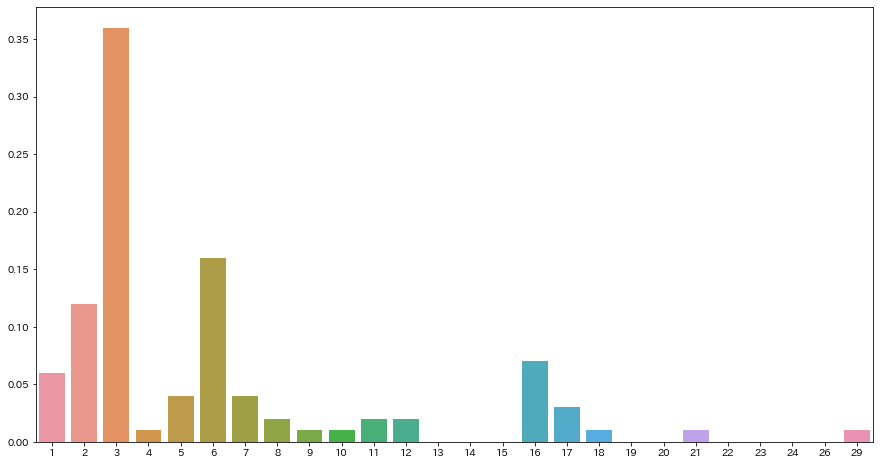

In [34]:
# 予測確率
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=np.unique(data['GENRE_ID1'].values), y=predict_vy_prob[0][0], ax=ax)

### Naive Bayes

In [35]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import preprocessing

## 前準備
mm = preprocessing.MinMaxScaler()
try:
  X_train_mm = mm.fit_transform(X_train)
except:
  X_train_mm = X_train
try:
  X_valid_mm = mm.transform(X_valid)
except:
  X_valid_mm = X_valid
try:
  X_test_mm = mm.transform(X_test)
except:
  X_test_mm = X_test

## モデル定義と学習をY_list分実行
predict_vy_prob_list = []
predict_y_prob_list = []
y_valid_list = []
y_test_list = []
for idx, Y_i in enumerate(Y_list):
  ### 説明変数（Y_i）を学習、検証、評価に分割
  ## 説明変数を分割
  y_train, y_valid_test = train_test_split(Y_i, train_size=0.8, random_state=144)
  y_valid, y_test = train_test_split(y_valid_test, train_size=0.5, random_state=144)
  y_valid_list.append(y_valid)
  y_test_list.append(y_test)
  ### モデル定義
  clf = MultinomialNB(alpha=.01)
  ### 学習
  clf.fit(X_train_mm, y_train)
  ### 予測
  predict_vy_prob = clf.predict_proba(X_valid_mm)
  predict_y_prob = clf.predict_proba(X_test_mm)
  ### 予測確率をリストに追加
  predict_vy_prob_list.append(predict_vy_prob)
  predict_y_prob_list.append(predict_y_prob)
  ### 簡単な予測精度
  print(f'{idx}番目')
  print('検証正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_vy_prob.T[0] ] ) == y_valid) / y_valid.size)
  print('評価正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_y_prob.T[0] ] ) == y_test) / y_test.size)
  print('='*144)


0番目
検証正解率： 0.8451882845188284
評価正解率： 0.8619246861924686
1番目
検証正解率： 0.9121338912133892
評価正解率： 0.891213389121339
2番目
検証正解率： 0.7615062761506276
評価正解率： 0.694560669456067
3番目
検証正解率： 0.6652719665271967
評価正解率： 0.7112970711297071
4番目
検証正解率： 0.99581589958159
評価正解率： 0.9916317991631799
5番目
検証正解率： 0.9205020920502092
評価正解率： 0.9456066945606695
6番目
検証正解率： 0.8702928870292888
評価正解率： 0.9246861924686193
7番目
検証正解率： 0.9037656903765691
評価正解率： 0.9372384937238494
8番目
検証正解率： 0.9790794979079498
評価正解率： 0.9832635983263598
9番目
検証正解率： 0.9916317991631799
評価正解率： 0.99581589958159
10番目
検証正解率： 0.9246861924686193
評価正解率： 0.9330543933054394
11番目
検証正解率： 0.9246861924686193
評価正解率： 0.9288702928870293
12番目
検証正解率： 0.9874476987447699
評価正解率： 0.9874476987447699
13番目
検証正解率： 0.99581589958159
評価正解率： 1.0
14番目
検証正解率： 1.0
評価正解率： 0.99581589958159
15番目
検証正解率： 0.9790794979079498
評価正解率： 0.9414225941422594
16番目
検証正解率： 0.9205020920502092
評価正解率： 0.9163179916317992
17番目
検証正解率： 0.899581589958159
評価正解率： 0.8786610878661087
18番目
検証正解率： 0.99163179916

In [38]:
result = get_proba2label_dict()

print('検証の正解率', np.sum(result['predict_vy_labels'] == result['y_valid_true']) / result['y_valid_true'].size)
print('評価の正解率', np.sum(result['predict_y_labels'] == result['y_test_true']) / result['y_test_true'].size)

検証の正解率 0.9203626220362622
評価の正解率 0.9251046025104602


### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

## モデル定義と学習をY_list分実行
predict_vy_prob_list = []
predict_y_prob_list = []
y_valid_list = []
y_test_list = []
for idx, Y_i in enumerate(Y_list):
  ### 説明変数（Y_i）を学習、検証、評価に分割
  ## 説明変数を分割
  y_train, y_valid_test = train_test_split(Y_i, train_size=0.8, random_state=144)
  y_valid, y_test = train_test_split(y_valid_test, train_size=0.5, random_state=144)
  y_valid_list.append(y_valid)
  y_test_list.append(y_test)
  ### モデル定義
  clf = DecisionTreeClassifier(random_state=144)
  ### 学習
  clf.fit(X_train, y_train)
  ### 予測
  predict_vy_prob = clf.predict_proba(X_valid)
  predict_y_prob = clf.predict_proba(X_test)
  ### 予測確率をリストに追加
  predict_vy_prob_list.append(predict_vy_prob)
  predict_y_prob_list.append(predict_y_prob)
  ### 簡単な予測精度
  print(f'{idx}番目')
  print('検証正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_vy_prob.T[0] ] ) == y_valid) / y_valid.size)
  print('評価正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_y_prob.T[0] ] ) == y_test) / y_test.size)
  print('='*144)


0番目
検証正解率： 0.7405857740585774
評価正解率： 0.7196652719665272
1番目
検証正解率： 0.8158995815899581
評価正解率： 0.803347280334728
2番目
検証正解率： 0.7405857740585774
評価正解率： 0.7112970711297071
3番目
検証正解率： 0.6192468619246861
評価正解率： 0.6317991631799164
4番目
検証正解率： 0.99581589958159
評価正解率： 0.9790794979079498
5番目
検証正解率： 0.8702928870292888
評価正解率： 0.8368200836820083
6番目
検証正解率： 0.7322175732217573
評価正解率： 0.7866108786610879
7番目
検証正解率： 0.8451882845188284
評価正解率： 0.8661087866108786
8番目
検証正解率： 0.9581589958158996
評価正解率： 0.9623430962343096
9番目
検証正解率： 0.9790794979079498
評価正解率： 0.9832635983263598
10番目
検証正解率： 0.8284518828451883
評価正解率： 0.8158995815899581
11番目
検証正解率： 0.8661087866108786
評価正解率： 0.8661087866108786
12番目
検証正解率： 0.9790794979079498
評価正解率： 0.9623430962343096
13番目
検証正解率： 0.9874476987447699
評価正解率： 0.9916317991631799
14番目
検証正解率： 0.9665271966527197
評価正解率： 0.9748953974895398
15番目
検証正解率： 0.9121338912133892
評価正解率： 0.8744769874476988
16番目
検証正解率： 0.8870292887029289
評価正解率： 0.8493723849372385
17番目
検証正解率： 0.8284518828451883
評価正解率： 0.8451

In [40]:
result = get_proba2label_dict()

print('検証の正解率', np.sum(result['predict_vy_labels'] == result['y_valid_true']) / result['y_valid_true'].size)
print('評価の正解率', np.sum(result['predict_y_labels'] == result['y_test_true']) / result['y_test_true'].size)

検証の正解率 0.900557880055788
評価の正解率 0.898326359832636


### XGBoost

In [41]:
from xgboost import XGBClassifier

## モデル定義と学習をY_list分実行
predict_vy_prob_list = []
predict_y_prob_list = []
y_valid_list = []
y_test_list = []
for idx, Y_i in enumerate(Y_list):
  ### 説明変数（Y_i）を学習、検証、評価に分割
  ## 説明変数を分割
  y_train, y_valid_test = train_test_split(Y_i, train_size=0.8, random_state=144)
  y_valid, y_test = train_test_split(y_valid_test, train_size=0.5, random_state=144)
  y_valid_list.append(y_valid)
  y_test_list.append(y_test)
  ### モデル定義
  clf = XGBClassifier(random_state=144)
  ### 学習
  clf.fit(X_train, y_train)
  ### 予測
  predict_vy_prob = clf.predict_proba(X_valid)
  predict_y_prob = clf.predict_proba(X_test)
  ### 予測確率をリストに追加
  predict_vy_prob_list.append(predict_vy_prob)
  predict_y_prob_list.append(predict_y_prob)
  ### 簡単な予測精度
  print(f'{idx}番目')
  print('検証正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_vy_prob.T[0] ] ) == y_valid) / y_valid.size)
  print('評価正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_y_prob.T[0] ] ) == y_test) / y_test.size)
  print('='*144)


0番目
検証正解率： 0.8451882845188284
評価正解率： 0.8619246861924686
1番目
検証正解率： 0.9121338912133892
評価正解率： 0.891213389121339
2番目
検証正解率： 0.8326359832635983
評価正解率： 0.7824267782426778
3番目
検証正解率： 0.7112970711297071
評価正解率： 0.7866108786610879
4番目
検証正解率： 0.99581589958159
評価正解率： 0.9916317991631799
5番目
検証正解率： 0.9246861924686193
評価正解率： 0.9497907949790795
6番目
検証正解率： 0.8661087866108786
評価正解率： 0.9246861924686193
7番目
検証正解率： 0.9121338912133892
評価正解率： 0.9414225941422594
8番目
検証正解率： 0.9790794979079498
評価正解率： 0.9832635983263598
9番目
検証正解率： 0.9916317991631799
評価正解率： 0.99581589958159
10番目
検証正解率： 0.9372384937238494
評価正解率： 0.9205020920502092
11番目
検証正解率： 0.9372384937238494
評価正解率： 0.9372384937238494
12番目
検証正解率： 0.9874476987447699
評価正解率： 0.9916317991631799
13番目
検証正解率： 0.99581589958159
評価正解率： 1.0
14番目
検証正解率： 1.0
評価正解率： 0.99581589958159
15番目
検証正解率： 0.9790794979079498
評価正解率： 0.9414225941422594
16番目
検証正解率： 0.9205020920502092
評価正解率： 0.9456066945606695
17番目
検証正解率： 0.9246861924686193
評価正解率： 0.9163179916317992
18番目
検証正解率： 0.991631799

In [42]:
result = get_proba2label_dict()

print('検証の正解率', np.sum(result['predict_vy_labels'] == result['y_valid_true']) / result['y_valid_true'].size)
print('評価の正解率', np.sum(result['predict_y_labels'] == result['y_test_true']) / result['y_test_true'].size)

検証の正解率 0.9347280334728033
評価の正解率 0.9405857740585774


### ロジスティック回帰

In [43]:
from sklearn.linear_model import LogisticRegression

## 前準備
mm = preprocessing.MinMaxScaler()
try:
  X_train_mm = mm.fit_transform(X_train)
except:
  X_train_mm = X_train
try:
  X_valid_mm = mm.transform(X_valid)
except:
  X_valid_mm = X_valid
try:
  X_test_mm = mm.transform(X_test)
except:
  X_test_mm = X_test
## モデル定義と学習をY_list分実行
predict_vy_prob_list = []
predict_y_prob_list = []
y_valid_list = []
y_test_list = []
for idx, Y_i in enumerate(Y_list):
  ### 説明変数（Y_i）を学習、検証、評価に分割
  ## 説明変数を分割
  y_train, y_valid_test = train_test_split(Y_i, train_size=0.8, random_state=144)
  y_valid, y_test = train_test_split(y_valid_test, train_size=0.5, random_state=144)
  y_valid_list.append(y_valid)
  y_test_list.append(y_test)
  ### モデル定義
  clf = LogisticRegression(random_state=144, max_iter=144000)
  ### 学習
  clf.fit(X_train_mm, y_train)
  ### 予測
  predict_vy_prob = clf.predict_proba(X_valid_mm)
  predict_y_prob = clf.predict_proba(X_test_mm)
  ### 予測確率をリストに追加
  predict_vy_prob_list.append(predict_vy_prob)
  predict_y_prob_list.append(predict_y_prob)
  ### 簡単な予測精度
  print(f'{idx}番目')
  print('検証正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_vy_prob.T[0] ] ) == y_valid) / y_valid.size)
  print('評価正解率：', sum(np.array( [ 0 if 0.5 <= prob else 1 for prob in predict_y_prob.T[0] ] ) == y_test) / y_test.size)
  print('='*144)


0番目
検証正解率： 0.8451882845188284
評価正解率： 0.8451882845188284
1番目
検証正解率： 0.9037656903765691
評価正解率： 0.8828451882845189
2番目
検証正解率： 0.8451882845188284
評価正解率： 0.7866108786610879
3番目
検証正解率： 0.7489539748953975
評価正解率： 0.7907949790794979
4番目
検証正解率： 0.99581589958159
評価正解率： 0.9916317991631799
5番目
検証正解率： 0.9414225941422594
評価正解率： 0.9456066945606695
6番目
検証正解率： 0.8577405857740585
評価正解率： 0.9037656903765691
7番目
検証正解率： 0.9163179916317992
評価正解率： 0.9330543933054394
8番目
検証正解率： 0.9707112970711297
評価正解率： 0.9832635983263598
9番目
検証正解率： 0.9916317991631799
評価正解率： 0.9916317991631799
10番目
検証正解率： 0.9288702928870293
評価正解率： 0.9163179916317992
11番目
検証正解率： 0.9372384937238494
評価正解率： 0.9372384937238494
12番目
検証正解率： 0.9832635983263598
評価正解率： 0.9916317991631799
13番目
検証正解率： 0.99581589958159
評価正解率： 1.0
14番目
検証正解率： 1.0
評価正解率： 0.99581589958159
15番目
検証正解率： 0.9790794979079498
評価正解率： 0.9414225941422594
16番目
検証正解率： 0.9246861924686193
評価正解率： 0.9372384937238494
17番目
検証正解率： 0.9246861924686193
評価正解率： 0.9330543933054394
18番目
検証正解率： 0.991631

In [44]:
result = get_proba2label_dict()

print('検証の正解率', np.sum(result['predict_vy_labels'] == result['y_valid_true']) / result['y_valid_true'].size)
print('評価の正解率', np.sum(result['predict_y_labels'] == result['y_test_true']) / result['y_test_true'].size)

検証の正解率 0.9344490934449093
評価の正解率 0.9415620641562065


### LSTM

In [45]:
import torch
import torch.nn as nn

# nn.Moduleを継承して新しいクラスを作成
class LSTMClassifier(nn.Module):
  # モデルで使う各ネットワークをコンストラクタで定義
  def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
    # 親クラスのコンストラクタ
    super(LSTMClassifier, self).__init__()
    # 隠れ層の次元数
    self.hidden_dim = hidden_dim
    # インプットの単語をベクトル化
    self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
    # LSTMの隠れ層
    self.lstm = nn.LSTM(embedding_dim, hidden_dim)
    # LSTMの出力を受け取って全結合してsoftmaxに食わせるための１層のネットワーク
    self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
    # softmaxのLog版、dim=0で列、dim=1で行方向を確率変換
    self.softmax = nn.LogSoftmax(dim=1)

  # 順伝播処理
  def forward(self, sentence):
    # 文章内の各単語をベクトル化して出力、2次元のtensor
    embeds = self.word_embeddings(sentence)
    # 2次元tensorをLSTMに食わせられる様にviewで３次元tensorにした上でLSTMへ
    # 上記で説明した様にmany to oneのタスクを解きたいので、第二戻り値だけ使用
    _, lstm_out = self.lstm(embeds.view(len(sentence), 1, -1))
    # lstm_out[0]は３次元tensorになってしまっているので2次元に調整して全結合
    tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
    # softmaxに食わせて、確率として表現
    tag_scores = self.softmax(tag_space)
    return tag_scores

In [ ]:
import torch.optim as optim

# 単語ID辞書を作成する
word2index = {}
for body in data['OVERVIEW']:
  wakati = tokenize(body)
  for word in wakati:
    if word in word2index: continue
    word2index[word] = len(word2index)

# trainとtestに分割
traindata, testdata = train_test_split(data, train_size=0.8)
# 単語のベクトル次元数
EMBEDDING_DIM = 100
# 隠れ層の次元数
HIDDEN_DIM = 128
# データ全体の単語数
VOCAB_SIZE = len(word2index)
# 分類先のカテゴリの数
TAG_SIZE = len(genre2id)
# モデル宣言
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAG_SIZE)
# 損失関数はNLLLoss()を使用、LogSoftmaxを使う際に使用
loss_function = nn.NLLLoss()
# 最適化の手法はSGD、lossの減りに時間かかるが一旦はこれを使う
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 文章を単語IDの系列データに変換
# PyTorchのLSTMのインプットになるデータなので、もちろんtensor型で
def sentence2index(sentence):
  wakati = tokenize(sentence)
  return torch.tensor([word2index.get(w, 0) for w in wakati], dtype=torch.long)

# 各エポックの合計loss値を格納する
losses = []
# 100ループ回してみる。（バッチ化とかGPU使ってないので結構時間かかる...）
for epoch in range(100):
    all_loss = 0
    for overview, genre in zip(traindata['OVERVIEW'], traindata['GENRE_ID1']):
        # モデルが持ってる勾配の情報をリセット
        model.zero_grad()
        # 文章を単語IDの系列に変換（modelに食わせられる形に変換）
        inputs = sentence2index(overview)
        # 順伝播の結果を受け取る
        out = model(inputs)
        # 正解カテゴリをテンソル化
        #answer = category2tensor(cat)
        answer = torch.tensor([ genre ], dtype=torch.long)
        # 正解とのlossを計算
        loss = loss_function(out, answer)
        # 勾配をセット
        loss.backward()
        # 逆伝播でパラメータ更新
        optimizer.step()
        # lossを集計
        all_loss += loss.item()
    losses.append(all_loss)
    print('epoch', epoch, '\t' , 'loss', all_loss)
print('done.')

epoch 0 	 loss 4696.8838012218475
epoch 1 	 loss 4034.5350971221924
epoch 2 	 loss 3926.8520582020283
epoch 3 	 loss 3826.5700471550226
epoch 4 	 loss 3716.477127581835
epoch 5 	 loss 3587.20763322711
epoch 6 	 loss 3428.9578347057104
epoch 7 	 loss 3231.716862127185
epoch 8 	 loss 2983.3618524689227
epoch 9 	 loss 2667.8201960790902
epoch 10 	 loss 2273.473399356706
epoch 11 	 loss 1820.4224072113575
epoch 12 	 loss 1372.0512883919
epoch 13 	 loss 951.064349785509
epoch 14 	 loss 826.6562333784295
epoch 15 	 loss 538.3017630319787
epoch 16 	 loss 344.31743014522795
epoch 17 	 loss 235.82511616436727
epoch 18 	 loss 170.79286409487477
epoch 19 	 loss 129.3067372402542
epoch 20 	 loss 101.14116161108325
epoch 21 	 loss 81.38928679925456
epoch 22 	 loss 66.65068830837701
epoch 23 	 loss 55.311043395331765
epoch 24 	 loss 46.41826237620042
epoch 25 	 loss 39.30905233482941
epoch 26 	 loss 33.58421373068219
epoch 27 	 loss 28.945562731382623
epoch 28 	 loss 25.168818506120907
epoch 29 	 lo

In [ ]:
plt.plot(losses)

In [ ]:
# テストデータの母数計算
test_num = len(testdata)
# 正解の件数
a = 0
# 勾配自動計算OFF
with torch.no_grad():
    for overview, genre in zip(testdata['OVERVIEW'], testdata['GENRE_ID1']):
        # テストデータの予測
        inputs = sentence2index(overview)
        out = model(inputs)

        # outの一番大きい要素を予測結果をする
        _, predict = torch.max(out, 1)

        answer = torch.tensor([ genre ], dtype=torch.long)
        if predict == answer:
            a += 1
print("predict : ", a / test_num)

In [ ]:
X_train.view(len(X_train), 2, -1).shape